# EM Algorithm

In [1]:
import seaborn
seaborn.set_palette("deep", desat=.6)
seaborn.set_context(rc={"figure.figsize": (8, 6)})
seaborn.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

### Example: Mixture of normals

z: [0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0]
x: ['1.10', '2.25', '1.66', '0.11', '2.28', '4.50', '3.38', '3.15', '4.44', '1.47', '1.41', '1.74', '1.56', '1.51', '4.90', '2.23', '2.17', '1.87', '4.03', '1.73', '3.88', '3.12', '2.68', '0.89', '1.76', '3.56', '2.37', '1.96', '3.39', '2.83', '0.99', '7.06', '2.88', '8.99', '3.39', '1.79', '2.88', '3.87', '2.63', '2.25', '1.96', '1.34', '2.28', '4.99', '3.40', '1.10', '1.56', '6.65', '6.70', '1.56', '1.90', '2.21', '7.98', '2.93', '4.24', '4.91', '8.57', '4.57', '7.01', '0.59', '2.59', '1.81', '6.43', '1.64', '3.06', '2.03', '2.60', '1.97', '3.70', '6.96', '1.54', '5.05', '1.49', '2.71', '-0.14', '4.44', '2.97', '3.46', '1.51', '5.95', '7.35', '2.97', '4.35', '3.87', '1.94', '1.45', '2.78', '1.13', '0.70', '4.76', '1.22', '3.16', '7.13', '4.60', '2.81', '4.76', '0.83', '1.87', '2.0

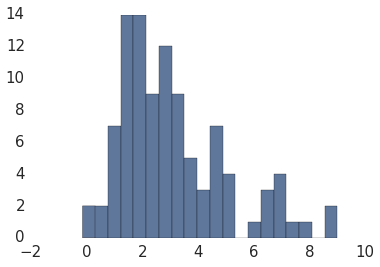

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# True parameter values
mu_true = [2, 5]
sigma_true = [1, 2]
psi_true = .4
n = 100

# Simulate from each distribution according to mixing proportion psi
z = np.random.binomial(1, psi_true, n)
print "z:", z
x = [np.random.normal(mu_true[i], sigma_true[i]) for i in z]
print "x:", ["%.2f" % _x for _x in x]
_ = plt.hist(x, bins=20)

### EM

#### E-step

Get expectation of the label for each data point with current parameters.

In [3]:
from scipy.stats.distributions import norm

def Estep(x, mu, sigma, psi):
    a = psi * norm.pdf(x, mu[0], sigma[0])
    b = (1. - psi) * norm.pdf(x, mu[1], sigma[1])
    return b / (a + b)

#### M-step

With the expectation of the label, maximize the likelihood with parameters

In [4]:
def Mstep(x, w):
    psi = np.mean(w) 
    
    mu = [np.sum((1-w) * x)/np.sum(1-w), np.sum(w * x)/np.sum(w)]
    
    sigma = [np.sqrt(np.sum((1-w) * (x - mu[0])**2)/np.sum(1-w)), 
             np.sqrt(np.sum(w * (x - mu[1])**2)/np.sum(w))]
    
    return mu, sigma, psi

In [5]:
# Initialize values
mu = np.random.normal(size=2)
sigma = np.random.uniform(0, 10, 2)
psi = np.random.random()

# Stopping criterion
crit = 1e-6

# Convergence flag
converged = False

# Loop until converged
while not converged:
    
    # E-step
    w = Estep(x, mu, sigma, psi)
    # M-step
    mu_new, sigma_new, psi_new = Mstep(x, w)
    
    # Check convergence
    converged = ((np.abs(psi_new - psi) < crit) 
                 & np.all(np.abs((np.array(mu_new) - np.array(mu)) < crit))
                 & np.all(np.abs((np.array(sigma_new) - np.array(sigma)) < crit)))
    mu, sigma, psi = mu_new, sigma_new, psi_new
                
print('A: N({0:.4f}, {1:.4f})\nB: N({2:.4f}, {3:.4f})\npsi: {4:.4f}'.format(
                        mu_new[0], sigma_new[0], mu_new[1], sigma_new[1], psi_new))

A: N(1.9530, 0.7498)
B: N(4.2750, 2.0693)
psi: 0.4935


# Exercise: Zero-inflated Poisson

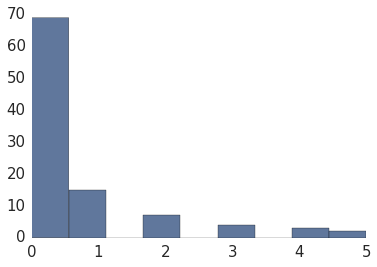

In [192]:
import numpy as np

# True parameter values
mu_true = 1.5
psi_true = .4
n = 100

# Simulate some data
data = np.array([np.random.poisson(mu_true)*(np.random.random()<psi_true) for i in range(n)])
_ = plt.hist(data, bins=9)

### EM

In [193]:
from scipy.stats.distributions import poisson

def Estep(x, mu, psi):
    a = poisson.pmf(x, mu) * psi
    b = (x == 0) * (1 - psi)
    return a / (a + b)

def Mstep(x, w):
    psi = float(sum(w)) / len(w)
    mu = float(sum(x)) / sum(w)
    return mu, psi

# Initialize values
mu = np.random.random()
psi = np.random.random()

# Stopping criterion
crit = 1e-6

# Convergence flag
converged = False

x = data

# Loop until converged
c = 0
while not converged:
    
    # E-step
    w = Estep(x, mu, psi)
    # M-step
    mu_new, psi_new = Mstep(x, w)
    
    # Check convergence
    converged = ((np.abs(psi_new - psi) < crit) and (np.abs(mu_new - mu) < crit))
    mu, psi = mu_new, psi_new
    c += 1
    if c >= 50:
        break
                
print mu, psi

1.6367610781 0.384906513497


### References


- http://nbviewer.ipython.org/github/fonnesbeck/Bios366/blob/master/notebooks/Section3_3-Expectation-Maximization.ipynb
- http://raphael.uaca.com/machine_learning/em_algorithm.md